In diesem Notebook wollen wir uns mit der Wurfbewegung beschäftigen.

Zunächst betrachten wir einmal die Translation eines geradeaus geworfenen Balls, 
den wir mit der einer Geschwindigkeit von 60 km/h werfen.

Geschwindigkeit =  23  km/h =  6.388888888888889  m/s


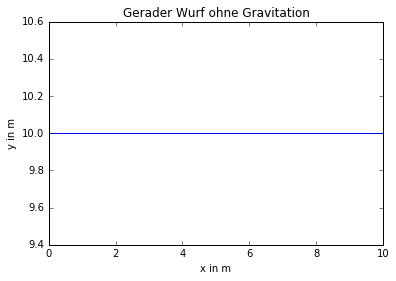

In [5]:
# Am Anfang müssen wir ein paar Bibliotheken laden, um alle Funktionen, die wir verwenden möchten, parat zu haben.
from math import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

# zunächst konstruieren wir uns eine X-achse und denken uns dazu die Einheit 'm'
x = linspace(0,10,100)

# Wir werfen den Ball aus einer Höhe von 10 m# zunächst konstruieren wir uns eine X-achse und denken uns dazu die Einheit 'm'
x = linspace(0,10,100)

# Wir werfen den Ball aus einer Höhe von 10 m los:
y0 = 10
v0_kmh = 23
v0_ms  = v0_kmh*1000.0/3600  # konvertiert die Geschwindigkeit von km/h in m/s
                             # Hier gilt es zu vermeiden, dass wir keine Integer Division durchführen.
print("Geschwindigkeit = ",v0_kmh," km/h = ",v0_ms," m/s")

y = y0*ones((100,1))
plot(x,y)
xlabel('x in m')
ylabel('y in m')
title('Gerader Wurf ohne Gravitation')

Jetzt berücksichtigen wir auch noch die Gravitation:

Die Bewegungsgleichung ist jetzt 
$$x(t) = v_0t \textrm{,     } y(t) = y0-\frac{1}{2}gt^2$$
Die erste der beiden Gleichungen können wir umformen nach $t$ als $t=x/v_0$ 
und bekommen somit eine Beziehung zwischen x und y:
$$y(x) = y0-\frac{1}{2}g\left(\frac{x}{v_0}\right)^2$$

(0, 11)

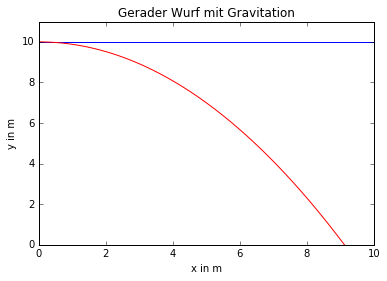

In [6]:
from scipy.constants import g  # wir importieren die Erdbeschleunigung in m/s^2

y_grav = y0-0.5*g*(x/v0_ms)**2
plot(x,y)
plot(x,y_grav,'r')
xlabel('x in m')
ylabel('y in m')
title('Gerader Wurf mit Gravitation')
ylim(0,11)

Teil 2:


Wenn wir jetzt den Wurf nicht horizontal, sondern schräg nach oben richten, dann sieht die Gleichung für 
den Wurf ohne Gravitation so aus:
$$x(t) = v_0\cos(\theta)t \textrm{,     }  y(t) = y_0+v_0\sin(\theta)t$$
Wenn wir die Zeit als Funktion von x darstellen
$$t = \frac{x}{v_0 \cos(\theta)}$$
dann können wir auch $y(x)$ berechnen:
$$\Rightarrow y(x) = y0+x\tan(\theta)$$

(0, 20)

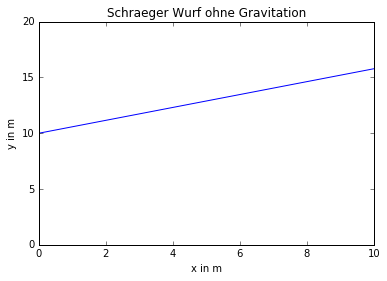

In [7]:
theta_deg = 30               # Angabe von theta in Grad
theta_rad = theta_deg*pi/180 # zunächst brauchen wir theta in rad

y = y0+x*tan(theta_rad)
plot(x,y)
xlabel('x in m')
ylabel('y in m')
title('Schraeger Wurf ohne Gravitation')
ylim(0,20)

Jetzt schalten wir die Gravitation wieder ein und bekommen aufgrund der Superposition folgende Bewegungsgleichung:
$$x(t) = v_0\cos(\theta)t \textrm{,     }  y(t) = y_0+v_0\sin(\theta)t-\frac{1}{2}gt^2$$
Wir verfahren jetzt genauso, wie im Schwerelosen Fall, indem wir verwenden, dass
$$t = \frac{x}{v_0 \cos(\theta)}$$
und diesen Eindruck in obige Zeit-abhängige Gleichung einsetzen:
$$y(x) = y0+x\tan(\theta)-\frac{g}{2}\left(\frac{x}{v_0 \cos(\theta)}\right)^2 = y0+x\tan(\theta)-\frac{g}{2v_0^2 \cos^2(\theta)}x^2 $$

(0, 15)

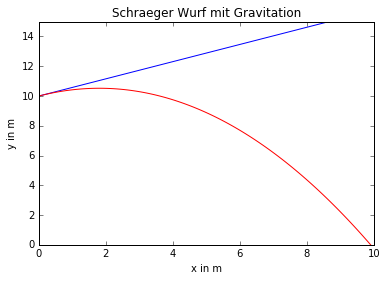

In [8]:
y_grav = y0+x*tan(theta_rad)-g/(2*(v0_ms*cos(theta_rad))**2)*x**2
plot(x,y)
plot(x,y_grav,'r')
xlabel('x in m')
ylabel('y in m')
title('Schraeger Wurf mit Gravitation')
ylim(0,15)

Wir können nun, ganz einfach durch ausprobieren, herausfinden, welcher Wurfwinkel optimal für die gegebenen Parameter (Ausgangshöhe $y_0$ und Wurfgeschwindigkeit $v_0$) ist.

Um die Wurfweite heruaszufinden müssen wir den Punkt $x$ finden, für den $y(x) = 0$.
Dafür müssen wir die quadratische Gleichung
$$y(x) = 0 = y0+x\tan(\theta)-\frac{g}{2v_0^2 \cos^2(\theta)}x^2 $$
lösen.
Die Lösung der allgemeinen quadratischen Gleichung $ax^2+bx+c = 0$ ist:
$$x_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
Also ist die Wurfweite
$$x_0 = \frac{-\tan(\theta) \pm \sqrt{\tan^2(\theta)+4\frac{gy_0}{2 [v_0 \cos(\theta)]^2}}}{-\frac{g}{[v_0 \cos(\theta)]^2}} $$
oder etwas vereinfacht (dabei berücksichtigend, dass wir nur positive $x_0$ suchen):
$$x_0 = \frac{[v_0 \cos(\theta)]^2}{g}\left(\tan(\theta) + \sqrt{\tan^2(\theta)+4\frac{gy_0}{2 [v_0 \cos(\theta)]^2}}\right) $$

Bester Wurf: Winkel = 22.5 deg, Wurfweite= 10.0284471846 m.


(0, 13)

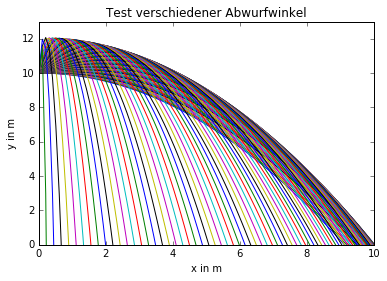

In [10]:
# Wir wollen auch die beste Wurfweite im Auge behalten.  
# Zunächst nehmen wir an, dass diese 0 ist:
x0_best = 0
Wurfweiten = [] # Generiere eine leere Liste von Wurfweiten
# Jetzt sollten wir noch festlegen, welchen Winkelbereich und wie viele 
# Winkel dazwischen wir absuchen möchten:
thetaStart = 0
thetaStop = 90
thetaSteps = 101
thetaWerte = linspace(thetaStart,thetaStop,thetaSteps)

# Jetzt probieren wir eine große Anzahl von Winkeln aus:
for theta_deg in thetaWerte:
    theta_rad = theta_deg*pi/180 # zunächst brauchen wir theta in rad
    # Zur Vereinfachung berechnen wir die X-Komponente der Wurfbewegung:
    vx = v0_ms*cos(theta_rad)
    # Jetzt sieht der Ausdruck für y(x etwas einfacher aus:
    y_grav = y0+x*tan(theta_rad)-0.5*g*(x/vx)**2
    plot(x,y_grav)
    # Berechne die Wurfweite:
    x0 = vx**2/g*(tan(theta_rad)+sqrt(tan(theta_rad)**2+4*g*y0/(2*vx**2)))
    Wurfweiten.append(x0) # Hänge die aktuelle Würfweite an Liste an
    if x0 > x0_best:
        theta_best = theta_deg# Wir wollen auch die beste Wurfweite im Auge behalten.  
        x0_best = x0
        
   
# Zum Schluß lassen wir uns den weitesten Wurf ausgeben:        
print("Bester Wurf: Winkel =",theta_best,"deg, Wurfweite=",x0_best, "m.")
# Natürlich wollen wir auch noch die Achsen beschriften:  
xlabel('x in m')
ylabel('y in m')
title('Test verschiedener Abwurfwinkel')
ylim(0,13)

Da wir uns die Wurfweiten alle gemerkt haben, können wir jetzt die Wurfweite als Funktion des Abwurfwinkels darstellen lassen.
Den Datenpunkt mit der maximalen Wurfweite können wir separat darstellen.

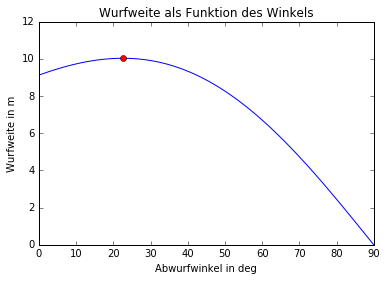

In [11]:
plot(thetaWerte,Wurfweiten)
plot(theta_best,x0_best,'ro')
xlabel('Abwurfwinkel in deg')
ylabel('Wurfweite in m')
title('Wurfweite als Funktion des Winkels')

Wie leicht zu erkennen ist, ist die Tangente an diese Wurfweiten-Funktion im Punkt des Maximums horizontal.
Das bedeutet, dass die Ableitung der Funktion
$$\frac{\partial \textrm{Wurfweite}}{\partial \theta} = 0$$ 
an dieser Stelle.

Das können wir, im Prinzip für den allgemeinen Ausdruck (etwas umgeformt)
$$\textrm{Wurfweite} = \frac{v_0^2 \sin(2\theta)}{2g}\left(1 + \sqrt{1+2\frac{gy_0}{[v_0 \sin(\theta)]^2}}\right) $$
so durchziehen.  

Allerdings ist es vermutlich instruktiver, den Spezialfall $y_0 = 0$, d.h. den Wurf aus der Ebene, zu betrachten.
Wenn $y_0 = 0$, dann verschwindet auch der zweite Term unter der Wurzel, so dass wir folgenden Ausdruck erhalten:
$$\textrm{Wurfweite}(y_0 = 0) = \frac{v_0^2 \sin(2\theta)}{g}$$
Die Ableitung nach dem Winkel ergibt  dann
$$\frac{\partial \textrm{Wurfweite}}{\partial \theta} = \frac{2v_0^2 \cos(2\theta)}{g} = 0$$ 

Damit dieser Ausdruck verschwindet muss gelten 
$$cos(2\theta) = 0 \Rightarrow 2\theta = \frac{\pi}{2} = 90^{\circ}$$

Daraus folgt dann, dass 
$$\theta = \frac{\pi}{4} = 45^{\circ}$$
so, wie wir es auch bekommen, wenn wir in der obigen Rechnung die Ausgangshöhe $y_0 = 0$ setzen und dieses Blatt neu berechnen lassen. .
